In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def compute_std_dev(accuracy):
    def compute_std_dev_ind(accs):
        mean = np.mean(accs)
        std_dev = np.std(accs)
        return np.array([mean - std_dev, mean + std_dev])

    std_dev = np.apply_along_axis(compute_std_dev_ind, 0, accuracy)
    return std_dev

In [3]:
single_model_methods = [
    "random",
    "good_random",
    "entropy",
    "uncertainty",
    "crowdlab",
]

ensemble_methods = [
    "disagreement",
    "crowdlab_ensemble",
]

In [4]:
method_name_map = {
    "random": "Random",
    "good_random": "Good Random",
    "entropy": "Entropy",
    "uncertainty": "Uncertainty",
    "crowdlab": "ActiveLab",
    "disagreement": "Disagreement (ensemble)",
    "crowdlab_ensemble": "ActiveLab (ensemble)"
}

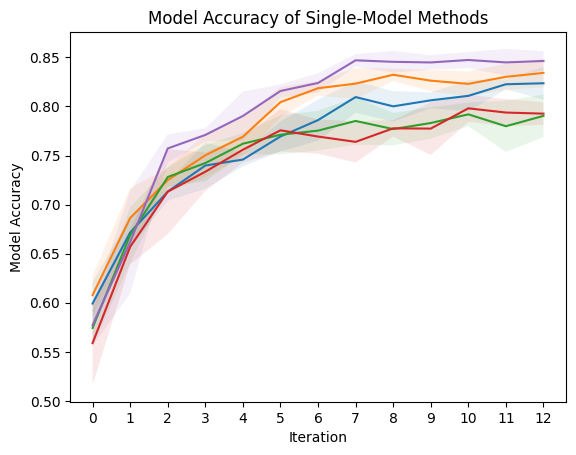

In [5]:
for method in single_model_methods:
    model_accuracy = np.array([np.load(f"results/{f}") for f in os.listdir(f"results/") if ".npy" in f and f.startswith(f"{method}_model_accuracy")])[:, :16]
    model_accuracy_std = compute_std_dev(model_accuracy)

    plt.plot(range(model_accuracy.shape[1]), np.mean(model_accuracy, axis=0), label=method_name_map[method])
    plt.fill_between(range(model_accuracy.shape[1]), model_accuracy_std[0], model_accuracy_std[1], alpha=0.1)
    
# plt.legend(bbox_to_anchor=(0.7, -0.12))
plt.xlabel("Iteration")
plt.ylabel("Model Accuracy")
plt.xticks(range(model_accuracy.shape[1]))
plt.title("Model Accuracy of Single-Model Methods")

plt.savefig('benchmark_graphs/cifar_single_model.png', bbox_inches = "tight")  
plt.savefig('benchmark_graphs/cifar_single_model.pdf', bbox_inches = "tight")

plt.show()

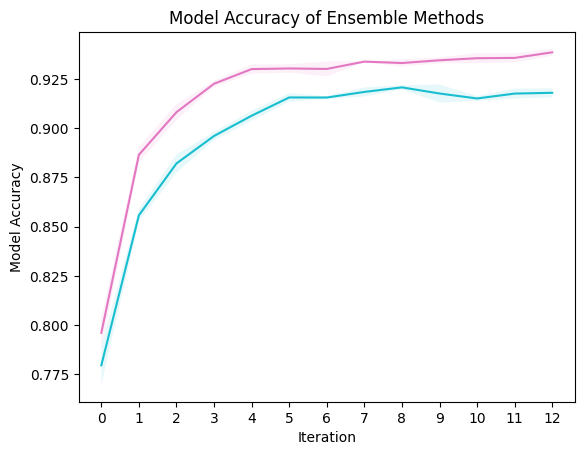

In [6]:
colors = ["tab:cyan", "tab:pink"]

for i in range(len(ensemble_methods)):
    method = ensemble_methods[i]
    model_accuracy = np.array([np.load(f"results/{f}") for f in os.listdir(f"results/") if ".npy" in f and f.startswith(f"{method}_model_accuracy")])[:, :16]
    model_accuracy_std = compute_std_dev(model_accuracy)

    plt.plot(range(model_accuracy.shape[1]), np.mean(model_accuracy, axis=0), label=method_name_map[method], color=colors[i])
    plt.fill_between(range(model_accuracy.shape[1]), model_accuracy_std[0], model_accuracy_std[1], alpha=0.1, facecolor=colors[i])
    
# plt.legend(bbox_to_anchor=(0.7, -0.12))
plt.xlabel("Iteration")
plt.ylabel("Model Accuracy")
plt.xticks(range(model_accuracy.shape[1]))
plt.title("Model Accuracy of Ensemble Methods")

plt.savefig('benchmark_graphs/cifar_ensemble_model.png', bbox_inches = "tight")  
plt.savefig('benchmark_graphs/cifar_ensemble_model.pdf', bbox_inches = "tight")

plt.show()

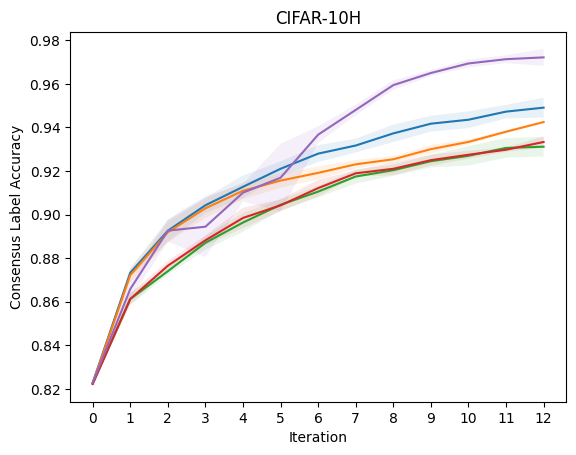

In [7]:
for method in single_model_methods:
    accuracy = np.array([np.load(f"results/{f}") for f in os.listdir(f"results/") if ".npy" in f and f.startswith(f"{method}_accuracy")])
    accuracy_std = compute_std_dev(accuracy)

    plt.plot(range(accuracy.shape[1]), np.mean(accuracy, axis=0), label=method_name_map[method])
    plt.fill_between(range(accuracy.shape[1]), accuracy_std[0], accuracy_std[1], alpha=0.1)

# plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Consensus Label Accuracy")
plt.xticks(range(accuracy.shape[1]))
plt.title("CIFAR-10H")

# plt.savefig('benchmark_graphs/cifar_single_consensus.png', bbox_inches = "tight")  
# plt.savefig('benchmark_graphs/cifar_single_consensus.pdf', bbox_inches = "tight")

plt.show()

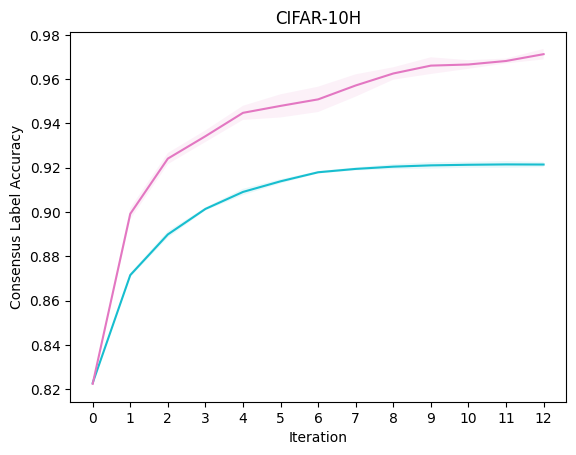

In [8]:
colors = ["tab:cyan", "tab:pink"]

for i in range(len(ensemble_methods)):
    method = ensemble_methods[i]
    accuracy = np.array([np.load(f"results/{f}") for f in os.listdir(f"results/") if ".npy" in f and f.startswith(f"{method}_accuracy")])
    accuracy_std = compute_std_dev(accuracy)

    plt.plot(range(accuracy.shape[1]), np.mean(accuracy, axis=0), label=method_name_map[method], color=colors[i])
    plt.fill_between(range(accuracy.shape[1]), accuracy_std[0], accuracy_std[1], alpha=0.1, facecolor=colors[i])

# plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Consensus Label Accuracy")
plt.xticks(range(accuracy.shape[1]))
plt.title("CIFAR-10H")

# plt.savefig('benchmark_graphs/cifar_ensemble_consensus.png', bbox_inches = "tight")  
# plt.savefig('benchmark_graphs/cifar_ensemble_consensus.pdf', bbox_inches = "tight")

plt.show()

In [9]:
%%capture

fig = plt.figure("Line plot")
legend_fig = plt.figure("Legend plot")
ax = fig.add_subplot()

random = ax.barh(1, 1, 1) 
good_random = ax.barh(1, 1, 1) 
entropy = ax.barh(1, 1, 1) 
uncertainty = ax.barh(1, 1, 1) 
crowdlab = ax.barh(1, 1, 1) 

legend_fig.legend(
    [random, good_random, entropy, uncertainty, crowdlab], 
    ["Random", "Good Random", "Entropy", "Uncertainty", "ActiveLab"], 
    loc="center", 
    ncol=3)

legend_fig.set_size_inches(5, 0.5)
legend_fig.savefig("benchmark_graphs/cifar_single_legend.pdf")
legend_fig.savefig("benchmark_graphs/cifar_single_legend.png")

In [10]:
%%capture

colors = ["tab:cyan", "tab:pink"]

fig = plt.figure("Line plot")
legend_fig = plt.figure("Legend plot")
ax = fig.add_subplot()

disagreement = ax.barh(1, 1, 1, color=colors[0]) 
crowdlab_ensemble = ax.barh(1, 1, 1, color=colors[1]) 

legend_fig.legend(
    [disagreement, crowdlab_ensemble], 
    ["Disagrement (ensemble)", "ActiveLab (ensemble)"], 
    loc="center", 
    ncol=2)

legend_fig.set_size_inches(5, 0.5)
legend_fig.savefig("benchmark_graphs/cifar_ensemble_legend.pdf")
legend_fig.savefig("benchmark_graphs/cifar_ensemble_legend.png")